<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/UFO_sightings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing UFO Sightings Data

## Setup

First we set some options for plot displays, then we import some of the packages we'll need for the analysis

In [1]:
# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

from plotnine import *

import seaborn as sns
import pandas as pd

ufo_sightings = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/ufo_sightings.csv")

## Data Cleaning

Next we do a little bit of data cleanup. One of the problems with this dataset is that it reports midnight as `24:00`, but the international standard for midnight is `00:00`. The functions below clean the data by replacing instances of `24:00` with `00:00`

In [10]:
def clean_data(ufo_sightings: pd.DataFrame):
    ufo_sightings['timestamp'] = pd.to_datetime(
        ufo_sightings["date_time"].apply(fix_24_hour_time), 
        infer_datetime_format = True)
    return ufo_sightings
    
def fix_24_hour_time(time: str):
    return time.replace("24:00", "00:00")

ufo_sightings = clean_data(ufo_sightings)

So, now what does the overall data look like?

In [11]:
ufo_sightings

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude,timestamp
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949-10-10 20:30:00
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949-10-10 21:00:00
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955-10-10 17:00:00
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956-10-10 21:00:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960-10-10 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013-09-09 21:15:00
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,2013-09-09 22:00:00
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013-09-09 22:00:00
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013-09-09 22:20:00


Let's collapse together all the sightings that appear at the same timestamp, then plot them.

timestamp
1906-11-11 00:00:00    1
1910-01-01 00:00:00    1
1910-06-01 15:00:00    1
1916-04-05 13:00:00    1
1920-06-11 21:00:00    1
                      ..
2014-05-07 21:10:00    1
2014-05-07 21:20:00    1
2014-05-07 23:30:00    1
2014-05-08 00:00:00    1
2014-05-08 18:45:00    1
Name: date_time, Length: 69434, dtype: int64

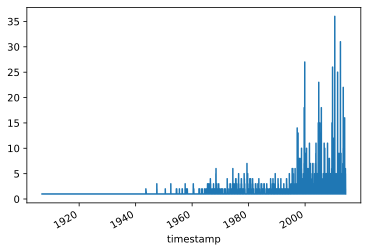

In [13]:
ufo_sightings.groupby('timestamp')['date_time'].agg('count').plot(kind = 'line')

A more explicit way to create the plot we want is to use `plotnine`'s `geom_histogram()` function

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 235'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


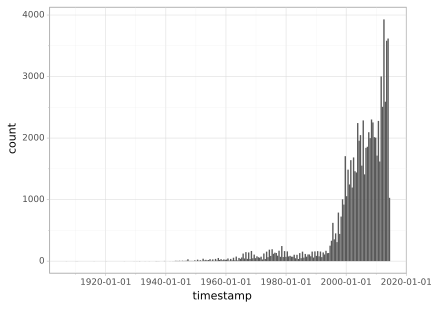

<ggplot: (8726643277632)>

In [14]:
(
    ggplot(
        aes(x = 'timestamp'),
        data = ufo_sightings
    ) +
    geom_histogram() +
    theme_light()
)

Let's look at just the sightings after 1990

In [16]:
ufo_sightings[ufo_sightings['timestamp'] > "1990"]

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude,timestamp
48,10/10/1990 21:00,ashburn,ga,us,triangle,120.0,2 minutes,Translucent Craft that makes No Sound While Mo...,10/8/2007,31.705833,-83.653333,1990-10-10 21:00:00
49,10/10/1991 22:00,frisco,nc,us,unknown,1800.0,30 minutes,A friend and myself were standing on the shore...,1/28/1999,35.235000,-75.628889,1991-10-10 22:00:00
50,10/10/1991 22:00,harrisburg,pa,us,triangle,600.0,10 minutes,We observed 3 triangular shaped high speed obj...,5/9/2003,40.273611,-76.884722,1991-10-10 22:00:00
51,10/10/1992 17:00,panama city,fl,us,formation,3600.0,1 hour(?),During a road trip to Panama City a friend and...,1/28/1999,30.158611,-85.660278,1992-10-10 17:00:00
52,10/10/1992 18:00,stafford,tx,us,unknown,10.0,10 seconds,A man emerges from a beam of light that shines...,4/18/2012,29.615833,-95.557500,1992-10-10 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013-09-09 21:15:00
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,2013-09-09 22:00:00
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013-09-09 22:00:00
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013-09-09 22:20:00


Let's examine the distribution of only those sightings after Jan 1, 1990.

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 60'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


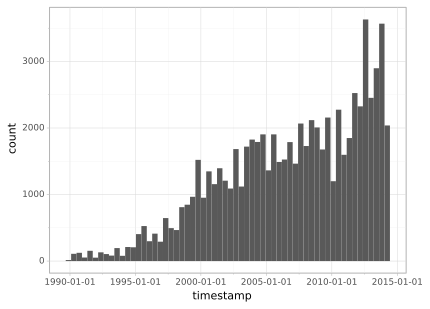

<ggplot: (-9223363310211989560)>

In [20]:
(
    ggplot(
        aes(x = 'timestamp'),
        data = ufo_sightings[ufo_sightings['timestamp'] > "1990"]
    ) +
    geom_histogram() +
    theme_light() 
)

How do the sightings break down by state?

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 60'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


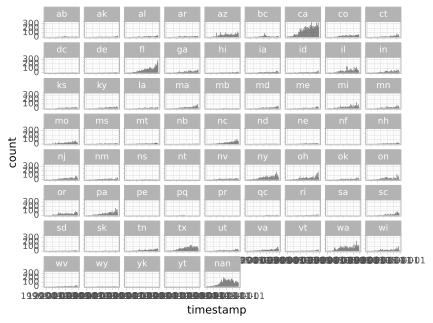

<ggplot: (-9223363310211508876)>

In [21]:
(
    ggplot(
        aes(x = 'timestamp'),
        data = ufo_sightings[ufo_sightings['timestamp'] > "1990"]
    ) +
    geom_histogram() +
    facet_wrap('~ state') +
    theme_light() 
)

Whoa! It looks like *California* has lots and lots of UFO sightings

In [22]:
ufo_sightings[ufo_sightings['state'] == 'ca']

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude,timestamp
10,10/10/1968 13:00,hawthorne,ca,us,circle,300.0,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.916389,-118.351667,1968-10-10 13:00:00
30,10/10/1979 22:00,san diego,ca,us,oval,180.0,3 minutes,My 2nd UFO sighting&#44 October 1979,8/5/2001,32.715278,-117.156389,1979-10-10 22:00:00
45,10/10/1989 00:00,calabasas,ca,us,disk,300.0,approx 5 min,Unidentified object on Mulholland Highway.,12/14/2004,34.157778,-118.637500,1989-10-10 00:00:00
63,10/10/1995 22:40,oakland,ca,us,NaN,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722,1995-10-10 22:40:00
72,10/10/1998 02:30,hollywood,ca,us,changing,300.0,5 minutes,I was standing outside on Sunset Blvd. at Vine...,11/1/1998,34.098333,-118.325833,1998-10-10 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80299,9/9/2012 20:00,arcata,ca,us,formation,600.0,10 minutes,Object with red and green lights moving sited ...,9/24/2012,40.866667,-124.081667,2012-09-09 20:00:00
80305,9/9/2012 20:30,ventura,ca,us,chevron,900.0,15 minutes,Beautiful bright blue delta shaped aerobatics.,9/24/2012,34.278333,-119.292222,2012-09-09 20:30:00
80310,9/9/2012 21:00,ventura,ca,us,circle,300.0,5 minutes,Bright Blue Object seen floating in sky near C...,9/24/2012,34.278333,-119.292222,2012-09-09 21:00:00
80316,9/9/2013 09:51,san diego,ca,us,light,4.0,~4 seconds,2 white lights zig-zag over Qualcomm Stadium (...,9/30/2013,32.715278,-117.156389,2013-09-09 09:51:00


Let's plot the histogram of cases in CA after Jan 1, 1990

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 89'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


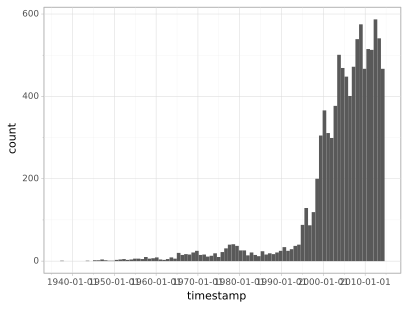

<ggplot: (-9223363310213354892)>

In [32]:
(
    ggplot(
        aes(x = 'timestamp'),
        data = ufo_sightings[
          (ufo_sightings['state'] == "ca")
        ]
    ) +
    geom_histogram() +
    theme_light() 
)

What happens if we group the observations by day?

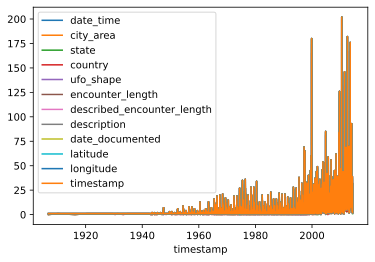

In [38]:
(
  ufo_sightings
    .groupby(ufo_sightings['timestamp'].dt.date)
    .count()
    .plot(kind = 'line')
)